In [6]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import seaborn as sns
import pandas as pd
from pandas import DataFrame, Series
sns.set(style='ticks', palette='Set2')
%matplotlib inline

We generate random points in the unit square. Then we label them in different ways: according to a line, according to their distance from the center point, and according to a cubic polynomial I created.

In [94]:
# generate a single random point
def single_random_pt(n_dims):
    return np.random.rand(n_dims)
def random_points(n_dims,n_points):
    return np.random.rand(n_points,n_dims)
def generate_labels_circle(points):
    return 1*(LA.norm(points - 0.5,2,1) < 1.0/3)
def generate_labels_line(points):
    return 1*(points[:,0] > points[:,1])
def cubic_poly(x):
    return 9*(x**3) -13.5*(x**2) + 5.5*x
def generate_labels_cubic(points):
    return 1*(cubic_poly(points[:,0])>points[:,1])

# number of training points, dims
n = 1500
d = 2

X_tr = random_points(d,n)
#y_tr = generate_labels_line(X_tr)
#y_tr = generate_labels_circle(X_tr)
y_tr = generate_labels_cubic(X_tr)


We can plot these points giving them a color according to their label.

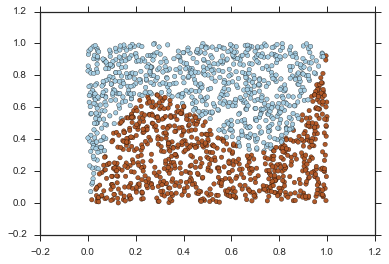

In [95]:
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

Next, we train SVMs with several different kernels and regularization parameters.


In [122]:
R = 0.005 # This is our regularization coefficient
C = 1/R  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_tr, y_tr)
poly_svc3 = svm.SVC(kernel='poly', degree=3, C=C).fit(X_tr, y_tr)
poly_svc5 = svm.SVC(kernel='poly', degree=5, C=C).fit(X_tr, y_tr)
poly_svc13 = svm.SVC(kernel='poly', degree=13, C=C).fit(X_tr, y_tr)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_tr, y_tr)
sig_svc = svm.SVC(kernel='sigmoid', gamma=0.7, C=C).fit(X_tr, y_tr)

Now let's plot how they do

In [123]:
h = 0.01
x_min = 0; x_max = 1; y_min = 0; y_max = 1;
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z_lin = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lin = Z_lin.reshape(xx.shape)

Z3 = poly_svc3.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = Z3.reshape(xx.shape)

Z5 = poly_svc5.predict(np.c_[xx.ravel(), yy.ravel()])
Z5 = Z5.reshape(xx.shape)

Z13 = poly_svc13.predict(np.c_[xx.ravel(), yy.ravel()])
Z13 = Z13.reshape(xx.shape)

Z_rbf = rbf_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

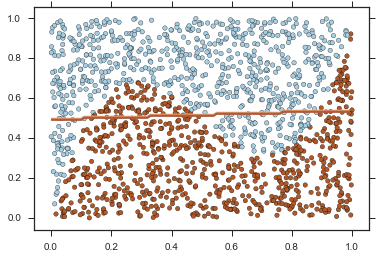

In [124]:
# Linear SVM
plt.contour(xx, yy, Z_lin, cmap=plt.cm.Paired, alpha=0.8)
#plt.contourf(xx, yy, Z5, cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

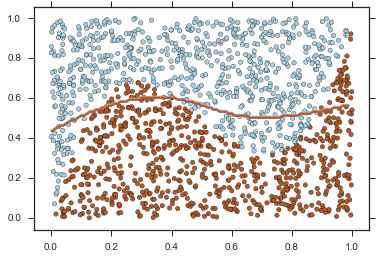

In [106]:
# polynomial kernel degree 3
plt.contour(xx, yy, Z3, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

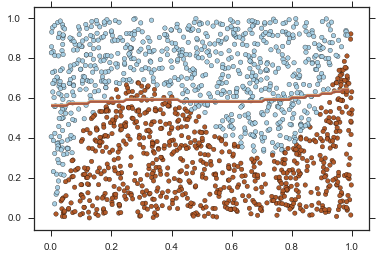

In [107]:
# polynomial kernel degree 5
plt.contour(xx, yy, Z5, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

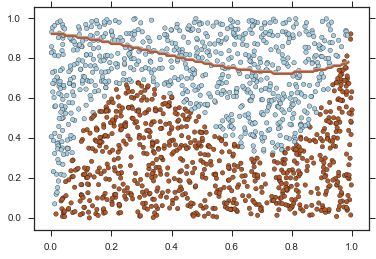

In [108]:
# polynomial kernel degree 13
plt.contour(xx, yy, Z13, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

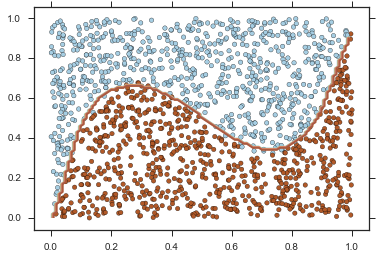

In [125]:
# RBF SVM
plt.contour(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
#plt.contourf(xx, yy, Z5, cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

# Now for a lot of cheating...

For the cubic labeling rule, all the results we saw were pretty disappointing. That's not necessarily a failure of the SVM methodology. It's a failure of the combination of kernel and regularization parameter that we chose.

We will make our own custom mapping to 3 dimensions (not one defined by a pre-specified Kernel) and see if we can't do better on the cubic points.

In [126]:
def custom_kernel_map(points):
    return cubic_poly(points[:,0]) - points[:,1]
X_newcol = custom_kernel_map(X_tr)
X_new = np.append(X_tr,X_newcol.reshape(X_newcol.shape[0],1),axis=1)
svc = svm.SVC(kernel='linear', C=1).fit(X_new, y_tr)

In [127]:
x_min = 0; x_max = 1; y_min = 0; y_max = 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

XYZ = np.c_[xx.ravel(), yy.ravel()]
Z = custom_kernel_map(XYZ)
XYZ = np.concatenate([XYZ,Z.reshape(Z.shape[0],1)],axis=1)
Z_newlin = svc.predict(XYZ)
Z_newlin = Z_newlin.reshape(xx.shape)


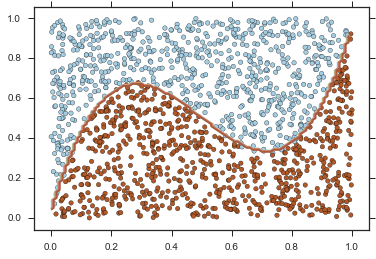

In [128]:
# Cheating Linear SVM
plt.contour(xx, yy, Z_newlin, cmap=plt.cm.Paired, alpha=0.8)
#plt.contourf(xx, yy, Z5, cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, cmap=plt.cm.Paired)
plt.show()

# Comparing SVM and Logistic Regression

Let's go back to the arsenic example and the iris examples.

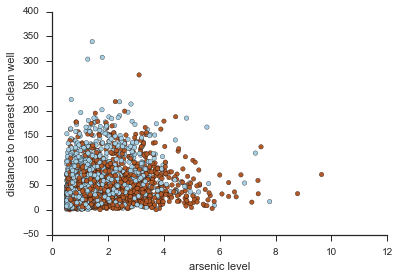

In [129]:
arsenic_wells = pd.read_csv('ARM_Data/arsenic/wells.dat', delimiter=' ')
X_arsenic = arsenic_wells[['arsenic','dist']].values
Y_arsenic = arsenic_wells['switch'].values
plt.scatter(X_arsenic[:, 0], X_arsenic[:, 1], c=Y_arsenic, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('arsenic level')
plt.ylabel('distance to nearest clean well')
sns.despine()

In [130]:
R = 1 # This is our regularization coefficient
C = 1/R  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_arsenic, Y_arsenic)

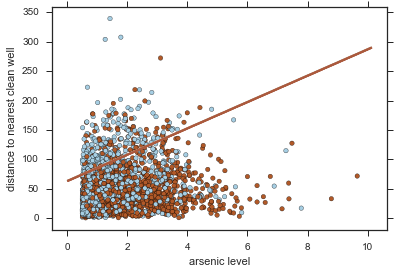

In [131]:
h = .04  # step size in the mesh
x_min, x_max = X_arsenic[:, 0].min() - .5, X_arsenic[:, 0].max() + .5
y_min, y_max = X_arsenic[:, 1].min() - .5, X_arsenic[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
#plt.contourf(xx, yy, Z5, cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(X_arsenic[:, 0], X_arsenic[:, 1], c=Y_arsenic, cmap=plt.cm.Paired)
plt.xlabel('arsenic level')
plt.ylabel('distance to nearest clean well')
plt.show()

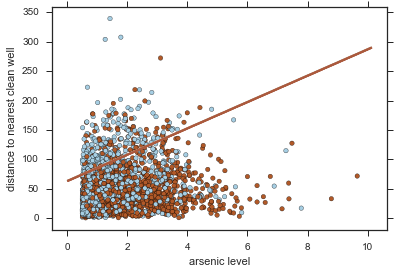

In [374]:
# We do the same for the RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1).fit(X_arsenic, Y_arsenic)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
#plt.contourf(xx, yy, Z5, cmap=plt.cm.Paired, alpha=0.8)
# Plot also the training points
plt.scatter(X_arsenic[:, 0], X_arsenic[:, 1], c=Y_arsenic, cmap=plt.cm.Paired)
plt.xlabel('arsenic level')
plt.ylabel('distance to nearest clean well')
plt.show()

This gives a result that is similar, though not identical, to what logistic regression gives. What is the difference? And how might we determine which is better?

Now for the IRIS example

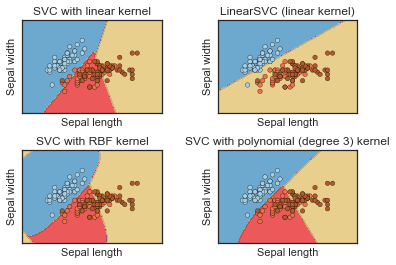

In [134]:
# import the iris data set again
iris = datasets.load_iris()
X_iris = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y_iris = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1e-3  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_iris, y_iris)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_iris, y_iris)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_iris, y_iris)
lin_svc = svm.LinearSVC(C=C).fit(X_iris, y_iris)

# create a mesh to plot in
x_min, x_max = X_iris[:, 0].min() - 1, X_iris[:, 0].max() + 1
y_min, y_max = X_iris[:, 1].min() - 1, X_iris[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()